In [ ]:
!pip install kaggle

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 141MB/s]
100% 163M/163M [00:01<00:00, 136MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1981.jpg', 'with_mask_2613.jpg', 'with_mask_2316.jpg', 'with_mask_916.jpg', 'with_mask_2429.jpg']
['with_mask_3586.jpg', 'with_mask_637.jpg', 'with_mask_2068.jpg', 'with_mask_2227.jpg', 'with_mask_1351.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3603.jpg', 'without_mask_519.jpg', 'without_mask_317.jpg', 'without_mask_1204.jpg', 'without_mask_856.jpg']
['without_mask_2944.jpg', 'without_mask_241.jpg', 'without_mask_1130.jpg', 'without_mask_1707.jpg', 'without_mask_2541.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


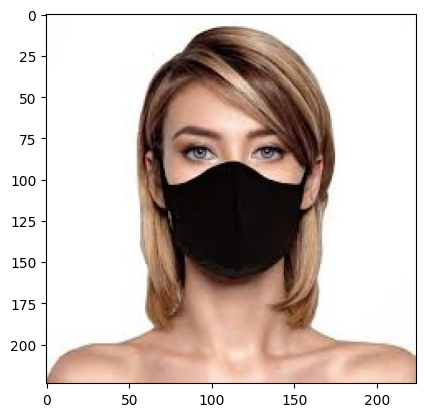

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2263.jpg')
imgplot = plt.imshow(img)
plt.show()

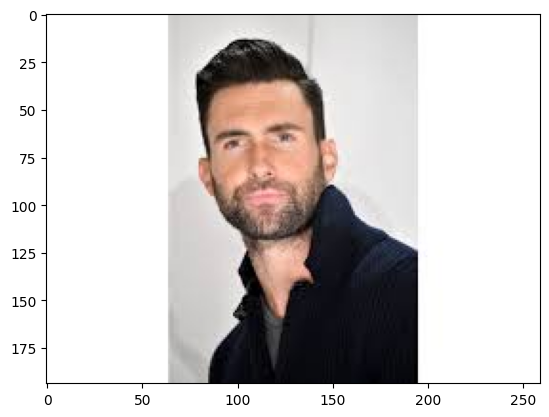

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2723.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[144, 124,  98],
        [153, 134, 110],
        [167, 150, 126],
        ...,
        [245,  61,  97],
        [245,  63,  97],
        [243,  62,  95]],

       [[125, 107,  83],
        [131, 113,  90],
        [142, 125, 102],
        ...,
        [243,  62,  97],
        [242,  63,  96],
        [241,  62,  94]],

       [[154, 137, 116],
        [156, 139, 118],
        [157, 141, 121],
        ...,
        [238,  62,  95],
        [235,  61,  93],
        [233,  61,  91]],

       ...,

       [[253, 246, 226],
        [251, 241, 222],
        [248, 235, 216],
        ...,
        [113,  32,  41],
        [120,  35,  44],
        [121,  36,  44]],

       [[251, 240, 218],
        [250, 236, 216],
        [247, 230, 209],
        ...,
        [127,  35,  46],
        [134,  39,  50],
        [137,  40,  51]],

       [[249, 234, 214],
        [248, 232, 210],
        [245, 226, 204],
        ...,
        [135,  39,  50],
        [143,  42,  54],
        [145,  43,  54]]], dtype=uint8)
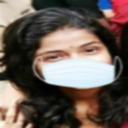

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[158, 158, 158],
        [157, 157, 157],
        [161, 161, 161],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [129, 129, 129]],

       [[161, 161, 161],
        [159, 159, 159],
        [162, 162, 162],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [132, 132, 132]],

       [[166, 166, 166],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [136, 136, 136],
        [130, 130, 130],
        [133, 133, 133]],

       ...,

       [[ 34,  37,  46],
        [ 33,  36,  45],
        [ 32,  35,  44],
        ...,
        [135, 138, 145],
        [132, 135, 142],
        [138, 141, 148]],

       [[ 33,  36,  45],
        [ 32,  35,  44],
        [ 32,  35,  44],
        ...,
        [126, 129, 136],
        [140, 143, 150],
        [140, 143, 150]],

       [[ 33,  36,  45],
        [ 32,  35,  44],
        [ 31,  34,  43],
        ...,
        [ 67,  70,  77],
        [137, 141, 148],
        [139, 142, 149]]], dtype=uint8)
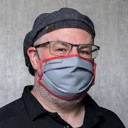

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.61960784, 0.61960784, 0.61960784],
        [0.61568627, 0.61568627, 0.61568627],
        [0.63137255, 0.63137255, 0.63137255],
        ...,
        [0.47058824, 0.47058824, 0.47058824],
        [0.47058824, 0.47058824, 0.47058824],
        [0.50588235, 0.50588235, 0.50588235]],

       [[0.63137255, 0.63137255, 0.63137255],
        [0.62352941, 0.62352941, 0.62352941],
        [0.63529412, 0.63529412, 0.63529412],
        ...,
        [0.50196078, 0.50196078, 0.50196078],
        [0.49411765, 0.49411765, 0.49411765],
        [0.51764706, 0.51764706, 0.51764706]],

       [[0.65098039, 0.65098039, 0.65098039],
        [0.63921569, 0.63921569, 0.63921569],
        [0.63921569, 0.63921569, 0.63921569],
        ...,
        [0.53333333, 0.53333333, 0.53333333],
        [0.50980392, 0.50980392, 0.50980392],
        [0.52156863, 0.52156863, 0.52156863]],

       ...,

       [[0.13333333, 0.14509804, 0.18039216],
        [0.12941176, 0.14117647, 0.17647059],
        [0.1254902 , 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

# 1st Convolutional Layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional Layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# 3rd Convolutional Layer
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# 4th Convolutional Layer
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# 5th Convolutional Layer
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

# 6th Dense Layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# 7th Dense Layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# 8th Dense Layer
model.add(keras.layers.Dense(32, activation='relu'))

# 9th Dense Layer
model.add(keras.layers.Dense(16, activation='relu'))

# 10th Dense Layer
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - acc: 0.6115 - loss: 0.6354 - val_acc: 0.6000 - val_loss: 0.6231
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - acc: 0.8210 - loss: 0.4195 - val_acc: 0.9388 - val_loss: 0.2053
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9217 - loss: 0.2436 - val_acc: 0.9107 - val_loss: 0.2249
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9314 - loss: 0.1993 - val_acc: 0.9570 - val_loss: 0.1434
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9421 - loss: 0.1628 - val_acc: 0.9603 - val_loss: 0.1308
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.9593 - loss: 0.1308 - val_acc: 0.9504 - val_loss: 0.1854
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9467 - loss: 0.1602 - val_acc: 0.9587 - val_loss: 0.1203
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9590 - loss: 0.1171 - val_acc: 0.9653 - val_loss: 0.1224
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21m

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9581 - loss: 0.1402
Test Accuracy = 0.9662474989891052


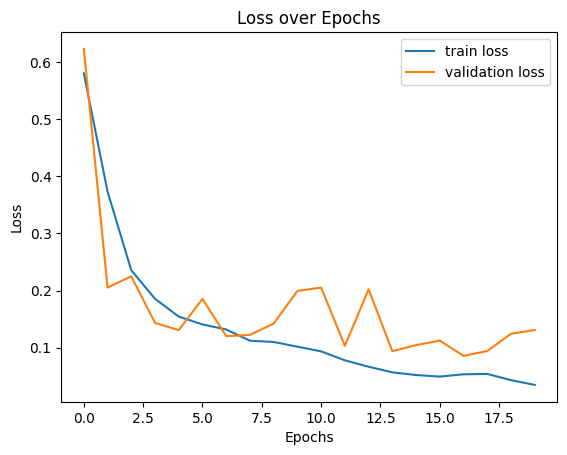

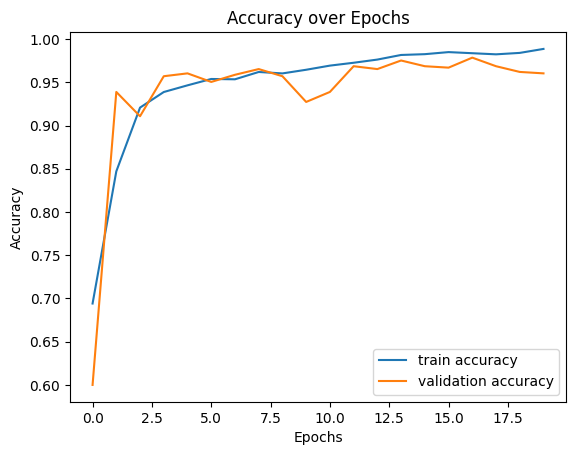

In [ ]:
h = history  # Assuming history contains the training history of your model

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# Plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

Path of the image to be predicted: /content/data/without_mask/without_mask_1004.jpg


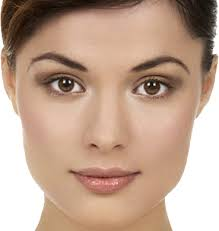

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
[[0.6662294  0.37421998]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1028.jpg


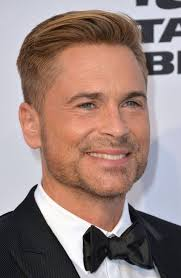

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.9098306  0.18829298]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is  wearing a mask')

else:

  print('The person in the image is not wearing a mask')

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.97
Precision: 0.95
Recall: 0.98
F1 Score: 0.97
Confusion Matrix:
[[730  38]
 [ 13 730]]


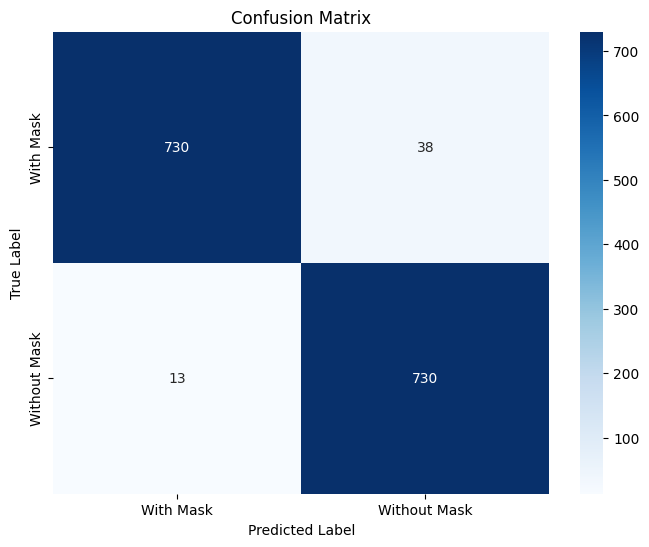

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
Y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix with labels
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['With Mask', 'Without Mask'], yticklabels=['With Mask', 'Without Mask'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
